In [1]:
import pandas as pd
import numpy as np


counts = pd.read_csv("/Users/zhasmina/Desktop/EXPERIMENTS/GENES/experiment_2(7)/iter1_batch_df.csv", 
                     index_col=0)
covmat =  pd.read_csv("/Users/zhasmina/Desktop/EXPERIMENTS/GENES/experiment_2(7)/covmat.csv", 
                      index_col=0)

sample_count = 2**10

batches = [1]*int(sample_count/2) + [2]*int(sample_count/2)
group = pd.DataFrame(np.array(['group1']*int(sample_count/4) + ['group2']*int(sample_count/4) + 
                              ['group1']*int(sample_count/4) + ['group2']*int(sample_count/4)))
group = group.rename(columns={0:"groups"})

covmat.reset_index(inplace=True, drop=True)
covmat["group"] = group
covmat = covmat.astype(str)

In [2]:
import pyrecombatseq.pycombat as prs 
import time

start = time.time()
adjusted = prs.pycombat_seq(counts=counts, batch=batches, covar_mod=covmat, 
                            alpha_reg=0.3, lambda_reg=0.8)
end = time.time()

print(f"Time elapsed: {(end-start)/60} min.")

[INFO] Found 2 batches
[INFO] Adjusting for 9 covariate(s) or covariate level(s)
[INFO] Estimating dispersions
[INFO] Fitting the GLM model
[INFO] shrinkage off - using GLM estimates for parameters
[INFO] Adjusting the data


Time elapsed: 0.22029509941736858 min.


In [3]:
adjusted.to_csv("/Users/zhasmina/Desktop/test_pycomb.csv")

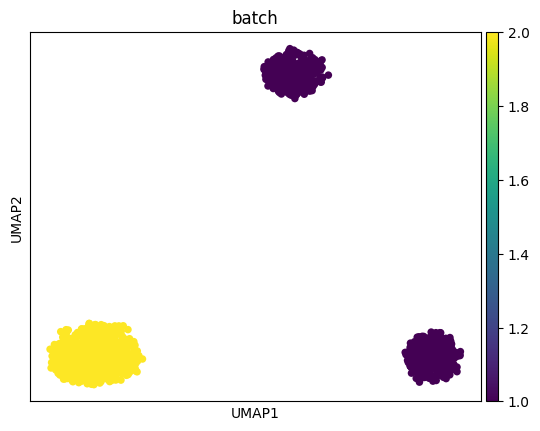

In [ ]:
import scanpy as sc
import anndata as ad

adata = ad.AnnData(counts2.T)
adata.obs["group"] = group.groups.tolist()
adata.obs["batch"] = batches

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_pcs=40)

sc.tl.umap(adata)

sc.pl.umap(adata, color='batch', palette='tab20', legend_loc=None)

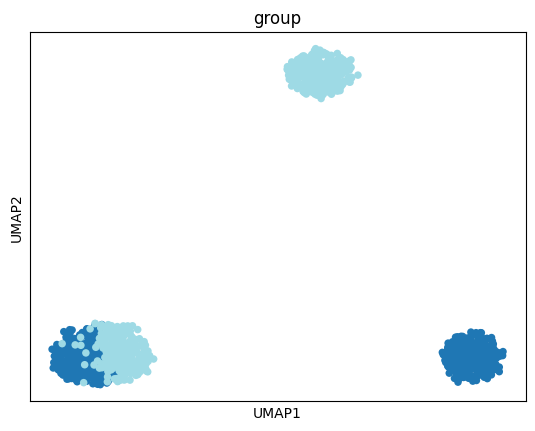

In [ ]:
sc.pl.umap(adata, color='group', palette='tab20', legend_loc=None)

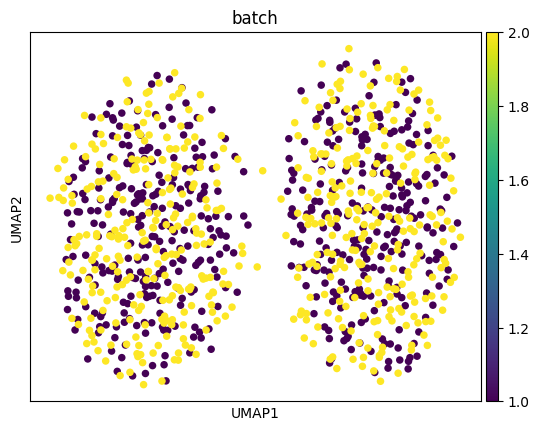

In [32]:
import scanpy as sc
import anndata as ad

cts = pd.read_csv("/Users/zhasmina/Desktop/EXPERIMENTS/GENES/experiment_2(14.3)/iter1_recombatseq_df.csv", 
                     index_col=0)

adata = ad.AnnData(cts.T)
adata.obs["group"] = group.groups.tolist()
adata.obs["batch"] = batches

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_pcs=40)

sc.tl.umap(adata)

sc.pl.umap(adata, color='batch', palette='tab20', legend_loc=None)

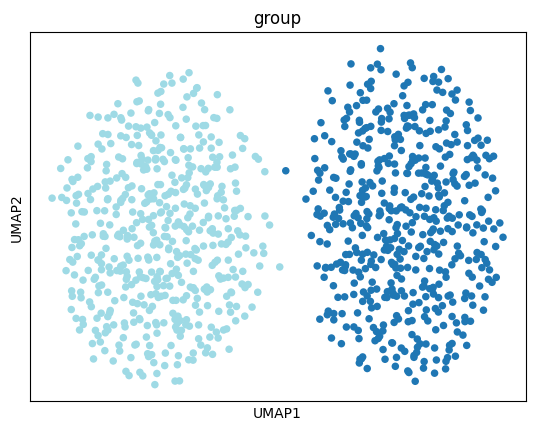

In [33]:
sc.pl.umap(adata, color='group', palette='tab20', legend_loc=None)

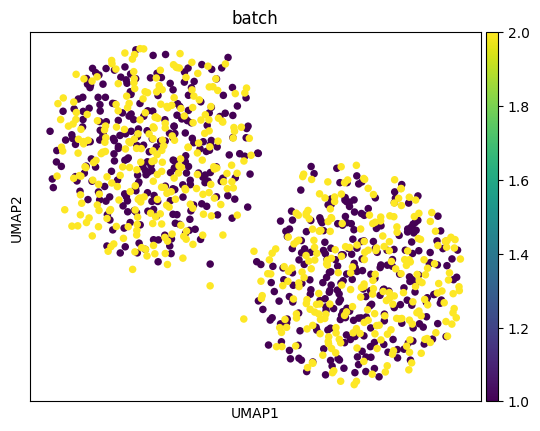

In [35]:
import scanpy as sc
import anndata as ad

adata = ad.AnnData(adjusted2.T)
adata.obs["group"] = group.groups.tolist()
adata.obs["batch"] = batches

sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_pcs=40)

sc.tl.umap(adata)

sc.pl.umap(adata, color='batch', palette='tab20', legend_loc=None)

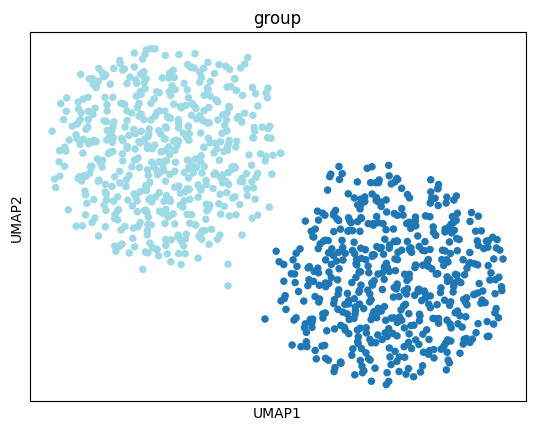

In [36]:
sc.pl.umap(adata, color='group', palette='tab20', legend_loc=None)